<h3>  PROCESS </h3>
<h4>  EDA : check out the data  </h4>

In [244]:
import Beer
from BeerScraper import create_data
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from bs4 import BeautifulSoup
import requests
import re
import nltk

pd.set_option('max_colwidth', 300)

df=pd.read_csv('beer.csv', header='infer')
df.head()
df2=df  #save a copy of df.  don't change this

In [133]:
print(df['review'][0])

smell  soft hop aroma with significant malt scents. this one smells very creamy. taste  and creamy it is. the traditional irish flavors come out at the tongue. this is creamy, not like a cream ale, but close. the malt is big, buttery, and very smooth. the hops are very unique. this is not a sharp hop flavor. this is an easy, saturated, well-mixed blend that plays a complimenting second fiddle to the malt base. no sweetness. the finish is nutty and big. this ale changes personalities at the end. mouthfeel  lightly carbonated and exceptionally smooth and creamy. drinkability  very creamy. i know that im repeating myself, but this ale is creamy like peanut butter. its actually kind of nutty to boot. creamy. 


## EDA: some exploration of the data  

### how many ratings have review with words?  
Review is the text to describe the beer.  I'll use text, so I need reviews with words.

  blank reviews: 10,998
verbose reviews: 39,490
  total reviews: 50,488
blank reviews are 48.42% out of 349 observations

CHART: top bar shows blank reviews, lower bar shows verbose reviews


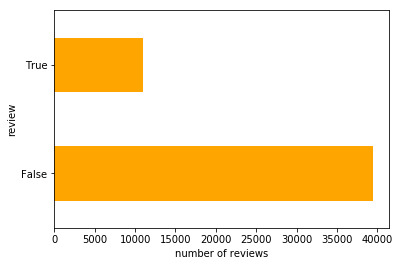

In [246]:
#look at the proportion of reviews without text/ or with text

import matplotlib.pyplot as plt
blank_reviews = df.groupby([df['review']==' ']).size()
print('  blank reviews:', format(sum(df.review==' '), ',d'))
print('verbose reviews:', format(sum(df.review!=' '), ',d'))
print('  total reviews:', format(len(df), ',d'))
print("blank reviews are {:.2f}% out of {} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))

%matplotlib inline
print('')
print('CHART: top bar shows blank reviews, lower bar shows verbose reviews')

_= blank_reviews.plot(kind='barh', color='orange')
_= plt.xlabel('number of reviews')
plt.show()

number of styles reviewed: 104


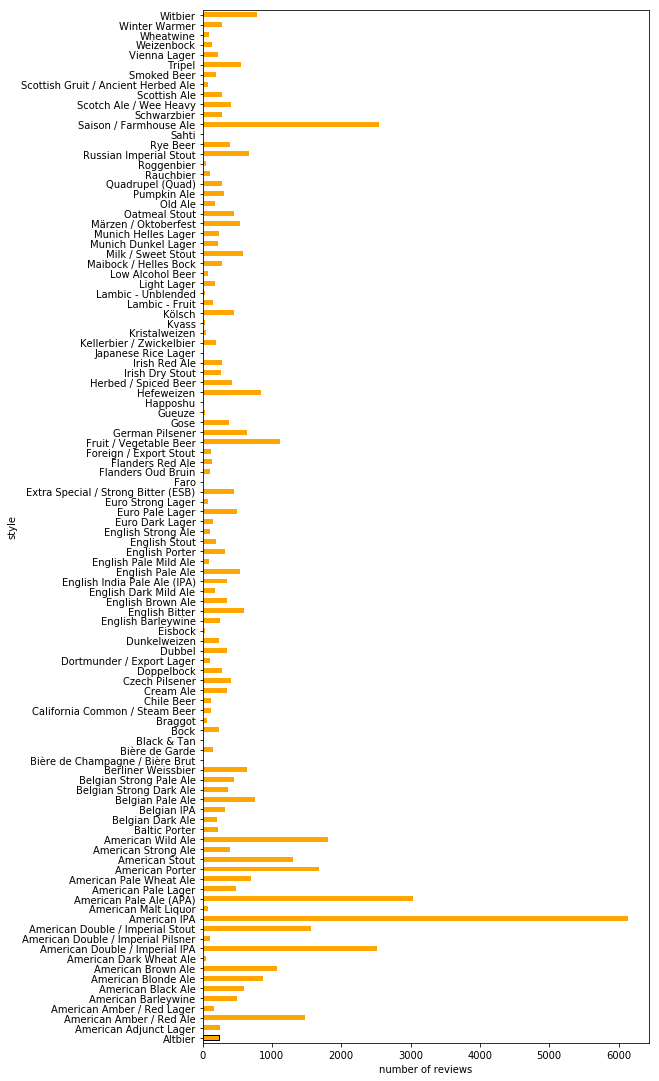

In [247]:
# how many STYLES are represented

styles = df.groupby(['style']).size()  
print('number of styles reviewed:',len(styles))
_= plt.figure(figsize=(8,19))
_= styles.plot(kind='barh', color='orange', edgecolor="k")
_= plt.xlabel('number of reviews')
plt.show()

In [253]:
print(styles[styles>70])

                                      count  \
style                                         
American IPA                         6132.0   
American Pale Ale (APA)              3035.0   
Saison / Farmhouse Ale               2538.0   
American Double / Imperial IPA       2514.0   
American Wild Ale                    1814.0   
American Porter                      1685.0   
American Double / Imperial Stout     1557.0   
American Amber / Red Ale             1484.0   
American Stout                       1303.0   
Fruit / Vegetable Beer               1113.0   
American Brown Ale                   1068.0   
American Blonde Ale                   876.0   
Hefeweizen                            845.0   
Witbier                               792.0   
Belgian Pale Ale                      755.0   
American Pale Wheat Ale               703.0   
Russian Imperial Stout                671.0   
Berliner Weissbier                    647.0   
German Pilsener                       646.0   
American Blac

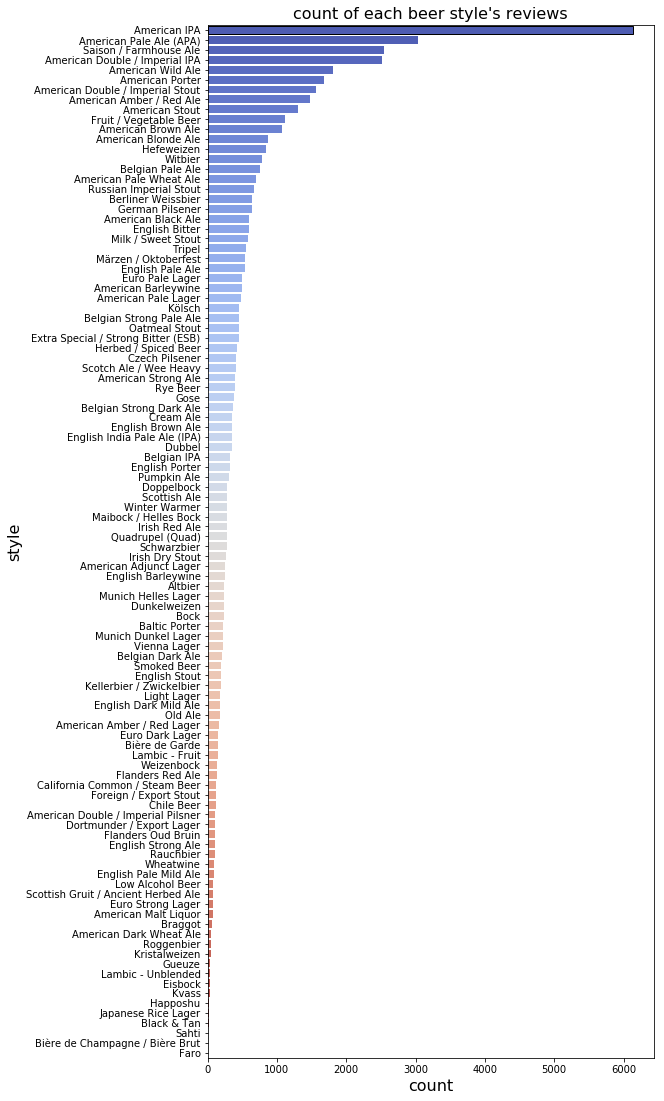

In [248]:
import seaborn as sns
styles = pd.DataFrame()
labels = df.groupby(['style']).size() 
styles['count'] = labels
styles['style'] = labels.index
styles = styles.sort_values(by='count', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(8,19)
sns.barplot(x='count', y='style', data=styles, ax=ax, palette="coolwarm", edgecolor="k")
plt.title("count of each beer style's reviews", size=16)
plt.ylabel('style', size=16)
plt.xlabel('count', size=16)
plt.show()

number of styles reviewed: 104


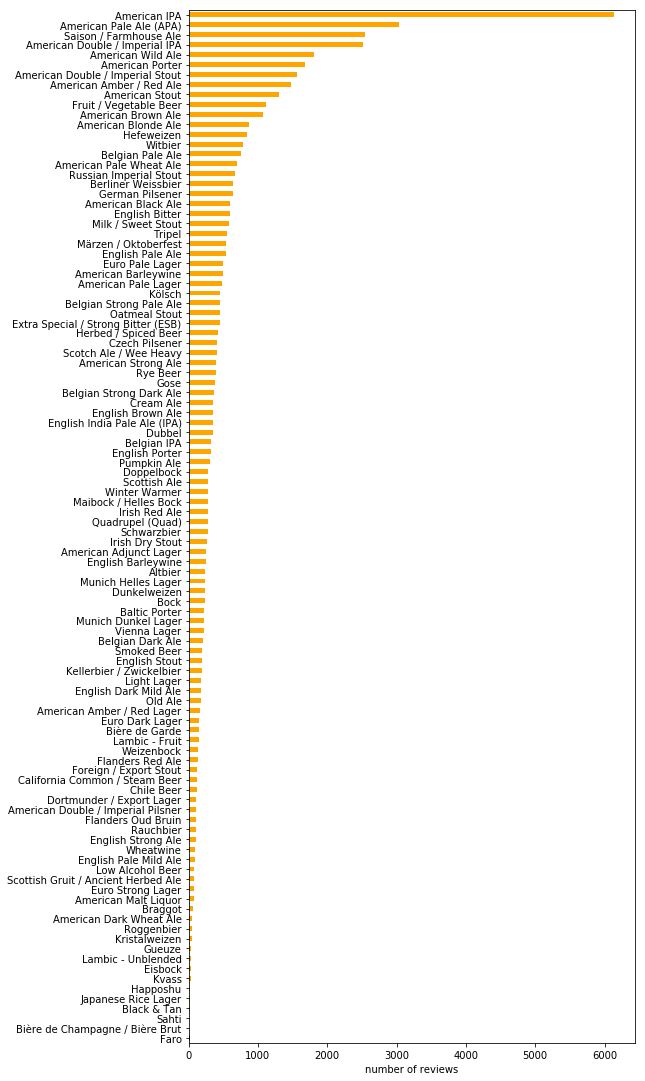

In [249]:
s = df['style'].value_counts(ascending=True)
print('number of styles reviewed:', len(s))
_= plt.figure(figsize=(8,19))
_= s.plot(kind='barh', color='orange', edgecolor="k")
_= plt.xlabel('number of reviews')
plt.show()

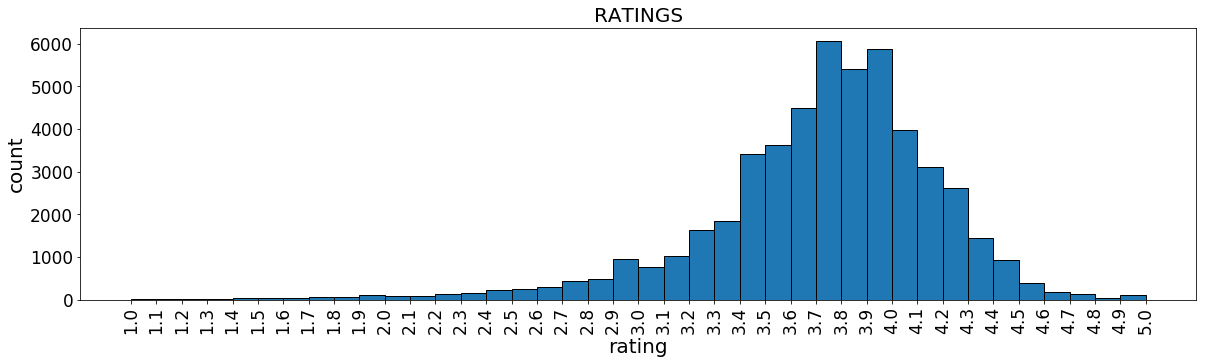

In [250]:
# ratings distribution.  Beers are rated 1 to 5, average could be anywhere in between.
import matplotlib.pyplot as plt
bins= np.arange(1,5.1,0.1)  # bins from 1 to 5, increments of 0.1
_= plt.figure(figsize=(20,5))
_= plt.hist(df['rating'], bins=bins, edgecolor="k") #
_= plt.xticks(bins, rotation='vertical',size=17)
_= plt.yticks(size=17)
_= plt.title('RATINGS', size=20)
_= plt.xlabel('rating', size=20)
_= plt.ylabel('count', size=20)
plt.show()

In [251]:
print('mean rating: {:.2f}'.format(df.rating.mean()))
print('standard deviation: {:.4f}'.format(df.rating.std()))
print('median rating:', df.rating.median())
print('lowest rating:', df.rating.min())
print('highest rating:', df.rating.max())

mean rating: 3.73
standard deviation: 0.4574
median rating: 3.79
lowest rating: 1.0
highest rating: 5.0


In [252]:
#look for bad values in ratings ( >5 or <1)
print(' >5:',sum(df.rating>5))
print('  5:',sum(df.rating==5))
print('  4:',sum(df.rating==4))
print('  3:',sum(df.rating==3))
print('  2:',sum(df.rating==2))
print('  1:',sum(df.rating==1))
print(' <1:',sum(df.rating<1))

 >5: 0
  5: 75
  4: 1603
  3: 461
  2: 49
  1: 11
 <1: 0


In [228]:
# examine distribution of brewerits

breweries = df.brewery.value_counts()
print('number of breweries reviewed:',len(breweries))
print('breweries with only 1 review:',sum(breweries==1))
print('breweries with 2 or 3 reviews:', sum(breweries==2)+sum(breweries==3))
print('')
print(breweries[breweries>70])


number of breweries reviewed: 8453
breweries with only 1 review: 3033
breweries with 2 or 3 reviews: 2598

Rock Bottom Restaurant & Brewery    175
Tired Hands Brewing Company         150
Cigar City Brewing                  121
Mikkeller ApS                        94
Iron Hill Brewery & Restaurant       93
Goose Island Beer Co.                93
The Bruery                           89
Imperial Oak Brewing                 88
Pizza Port Solana Beach              83
Minneapolis Town Hall Brewery        79
Stone Brewing                        74
Name: brewery, dtype: int64


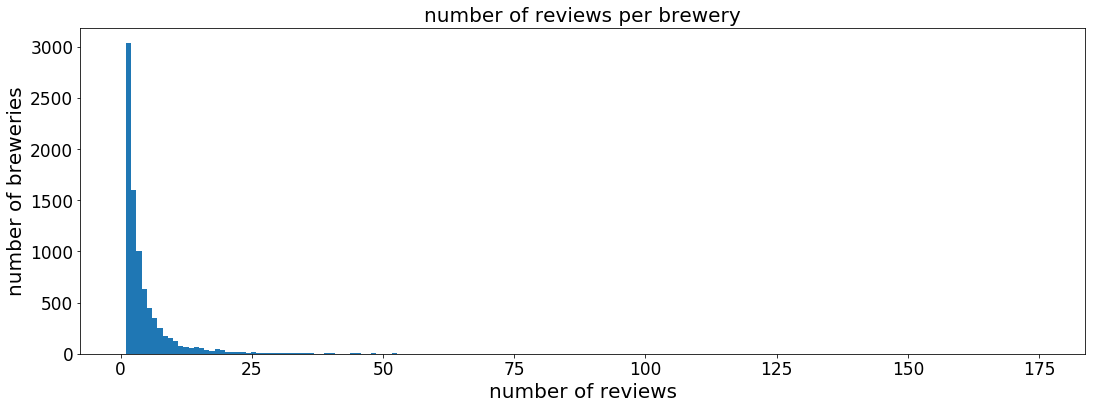

In [242]:
#_= breweries.hist(bins=175)
_= plt.figure(figsize=(18,6))
_= plt.hist(breweries, bins=175)
_= plt.xticks(size=17)
_= plt.yticks(size=17)
_= plt.title('number of reviews per brewery', size=20)
_= plt.xlabel('number of reviews', size=20)
_= plt.ylabel('number of breweries', size=20)
plt.show()

In [ ]:
# this is from another module.  Unlikely to use it, but I'll keep it around
def remove_punc(word):
    # Removes punctuation from a word
    return re.sub(r'[^\w\s]', '', word)

for i in range(len(df)):
    # split into list of words
    words = df['review'][i].split()  
    # Remove stopwords
    words = [word for word in words if word not in nltk.corpus.stopwords.words("english")]
    # Remove puncutation
    words = [remove_punc(word) for word in words]
    # Remove numbers
    words = [word for word in words if not word.isdigit()]
    # Remove some particular words that break things
    #words = [word for word in words if word not in ['name', 'style', 'brewery', 'rating', '']]
    df['words'][i] = words

In [46]:
df.head()

,name,brewery,style,rating,review,words
0,Big Rock Ale,Big Rock Brewery,Scottish Ale,3.90,"smell  soft hop aroma with significant malt scents. this one smells very creamy. taste  and creamy it is. the traditional irish flavors come out at the tongue. this is creamy, not like a cream ale, but close. the malt is big, buttery, and very smooth. the hops are very unique. this is not a sh...","[smell, , soft, hop, aroma, significant, malt, scents, one, smells, creamy, taste, , creamy, is, traditional, irish, flavors, come, tongue, creamy, like, cream, ale, close, malt, big, buttery, smooth, hops, unique, sharp, hop, flavor, easy, saturated, wellmixed, blend, plays, complimenting, seco..."
1,Flip Ale,Dogfish Head Craft Brewery,Old Ale,4.08,on tap at dfh rehoboth... collab with eatily... cardamom and red wine must. golden orange. .no head. typical dfh yeast aroma. ..some spice and maybe a belgian influence. sweet spicy and somewhat fruity.. not much old ale characteristic. too light for that. its still tasty. the cardamom does add...,"[tap, dfh, rehoboth, collab, eatily, cardamom, red, wine, must, golden, orange, no, head, typical, dfh, yeast, aroma, some, spice, maybe, belgian, influence, sweet, spicy, somewhat, fruity, much, old, ale, characteristic, light, that, still, tasty, cardamom, add, nice, flavor, still, kind, lacki..."
2,The Almond Marzen Project - Beer Camp #26,Sierra Nevada Brewing Co.,Märzen / Oktoberfest,3.78,"nice auburn impressions, tons of clarity, solid inch of off white head. aroma was a little bit sweet and nutty. taste gave a little more sweetness, stayed away from hops and bitterness, relatively light bodied. nothing almond came out of it that was obvious. kind of a fancied up oktoberfest ...","[nice, auburn, impressions, tons, clarity, solid, inch, white, head, aroma, little, bit, sweet, nutty, taste, gave, little, sweetness, stayed, away, hops, bitterness, relatively, light, bodied, nothing, almond, came, obvious, kind, fancied, oktoberfest, good, really, change, anything, use, almon..."
3,Perpetual Burn IPA,Rock Bottom Restaurant & Brewery,American IPA,3.88,"s - piney, a little cat piss in a good way, skunky bud. t - some caramel front, tons of hops at the finish. m - medium body, a little too sharp and unbalanced for me. d - very sessionable considering the hops and abv.","[, piney, little, cat, piss, good, way, skunky, bud, , caramel, front, tons, hops, finish, , medium, body, little, sharp, unbalanced, me, , sessionable, considering, hops, abv]"
4,Hop Monster DRIPA,Iron Hill Brewery & Restaurant,American Double / Imperial IPA,4.14,"double red ipa, full-bodied rich caramel malt character with a generous amount of american hops. beware the monster! a: this was a clear, amber tinted copper color. it was served to me with a firm, frothy cap. s: sugar cookie/short bread malts with a little honey and a very strong blast of tro...","[double, red, ipa, fullbodied, rich, caramel, malt, character, generous, amount, american, hops, beware, monster, a, clear, amber, tinted, copper, color, served, firm, frothy, cap, s, sugar, cookieshort, bread, malts, little, honey, strong, blast, tropical, fruit, hops, fresh, appealing, t, tons..."
